In [117]:
import pandas as pd

df = pd.read_csv("athlete_events.csv",engine='python', error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
from IPython.display import display
import matplotlib.pyplot as plt


display(df.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [127]:
index = df.index
number_of_rows = len(index)
print("Total number of rows: ",number_of_rows)

Total number of rows:  271116


**Q1**

In [120]:
df_london_2012 = df[(df["Year"] == 2012) & (df["City"] == "London")]

distinct_ids_df = df_london_2012.drop_duplicates(subset=["ID"])

index = distinct_ids_df.index

number_of_unique_id = len(index)

print("Number of unique participant that were present at London 2021 Games are: ", number_of_unique_id)

Number of unique participant that were present at London 2021 Games are:  10517


**Q2**

In [121]:
df_beijing_2008 = df[(df["Year"] == 2008) & (df["City"] == "Beijing") ]

df_male = df_beijing_2008[df_beijing_2008["Sex"] == "M"]
df_female = df_beijing_2008[df_beijing_2008["Sex"] == "F"]

distinct_male = df_male.drop_duplicates(subset=["ID"])
distinct_female = df_female.drop_duplicates(subset=["ID"])

index_male = distinct_male.index
index_female = distinct_female.index

print("Number of unique MALE participant that were present at Beijing 2008 Games are: ", len(index_male))
print("Number of unique FEMALE participant that were present at Beijing 2008 Games are: ", len(index_female))


Number of unique MALE participant that were present at Beijing 2008 Games are:  6290
Number of unique FEMALE participant that were present at Beijing 2008 Games are:  4609


**Q3**

In [122]:
df_medals = df[df["Medal"].notna()]
df_medals = df_medals["Name"].value_counts(ascending=False)

display(df_medals.head(10))


Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Borys Anfiyanovych Shakhlin                        13
Paavo Johannes Nurmi                               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Dara Grace Torres (-Hoffman, -Minas)               12
Name: Name, dtype: int64

**Q4**

In [123]:
years = df["Year"].unique()
years.sort()
display(years)

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

In [124]:
nations_2012 = df[(df["Year"] == 2008)]
# nations_2012 = nations_2012["City"].unique()
nations_2012 = nations_2012["Team"].unique()
display(len(nations_2012))

292

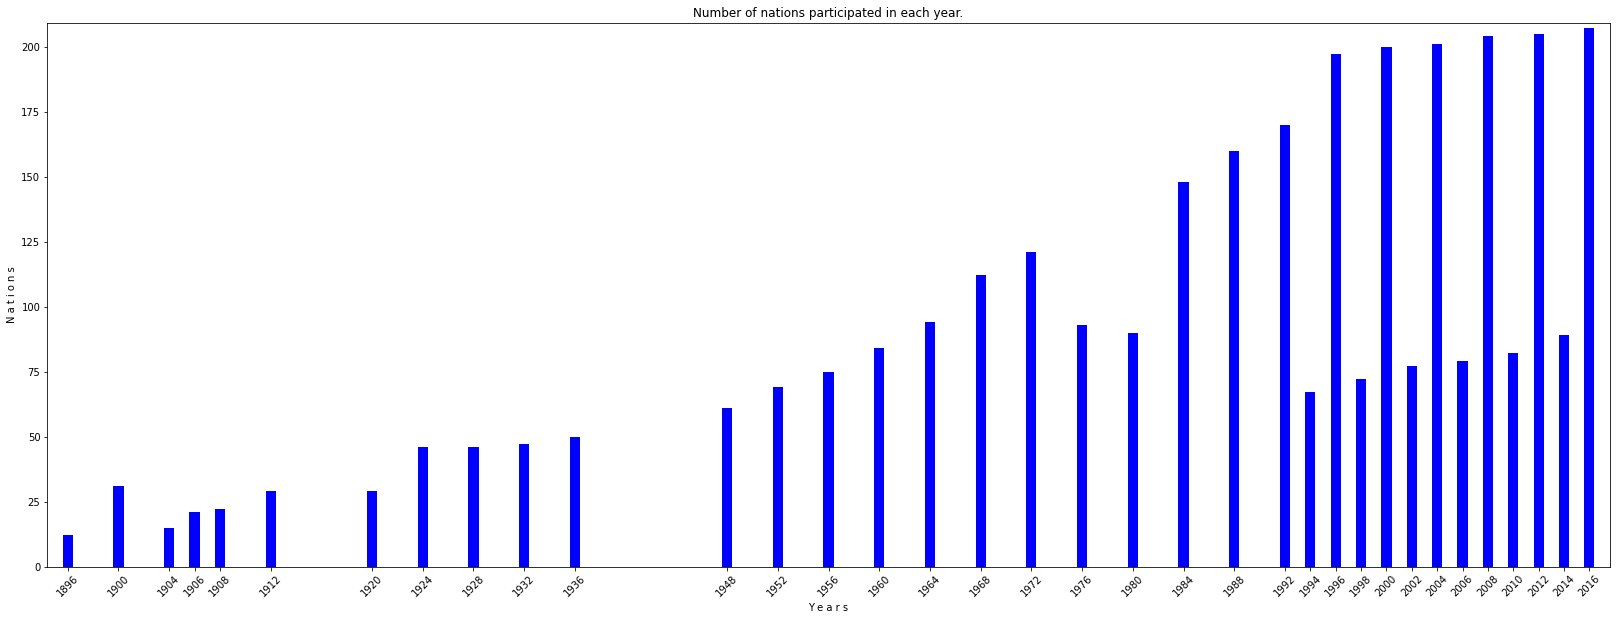

In [131]:
years_nations = {}
for y in years:
  nations = df[(df["Year"] == y)]
  nations = nations["NOC"].unique()
  years_nations[y] = len(nations)


plt.rcParams["figure.figsize"] = (28, 10)
plt.bar(years_nations.keys(), years_nations.values(), color='b')
plt.xticks(list(years_nations.keys()),rotation=45)
plt.margins(x=0.01, y=0.01)
plt.title("Number of nations participated in each year.")
plt.xlabel("Y e a r s")
plt.ylabel("N a t i o n s")
plt.show()

**Q5. Optional**

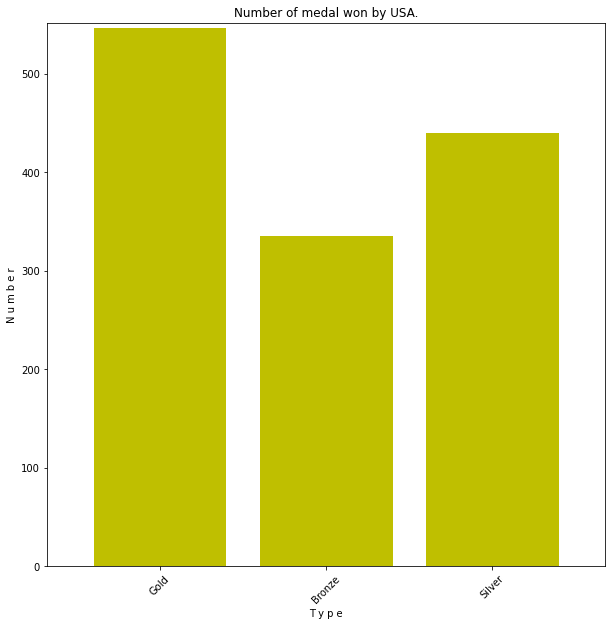

In [133]:
df_medals = df[df["Medal"].notna()]
nations = df_medals[(df_medals["Year"] > 2000) & (df_medals["Team"] == "United States")]
# display(nations)

medals_name = df_medals["Medal"].unique()
# display(meals_name)

medal_dict = {}

for name in medals_name:
  gold_medal_nations = nations[nations["Medal"] == name]
  medal_dict[name] = len(gold_medal_nations)

plt.rcParams["figure.figsize"] = (10, 10)
plt.bar(medal_dict.keys(), medal_dict.values(), color='y')
plt.xticks(list(medal_dict.keys()),rotation=45)
plt.margins(x=0.1, y=0.01)
plt.title("Number of medal won by USA.")
plt.xlabel("T y p e")
plt.ylabel("N u m b e r")
plt.show()